## 1. Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import string

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 2. Data Cleaning

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [14]:
df["target"].replace({"ham": 0, "spam": 1}, inplace=True)

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 3. EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

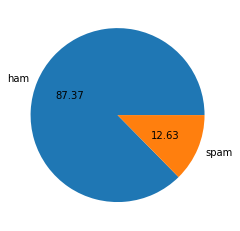

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

- Data is imbalanced

In [18]:
import nltk

In [19]:
# nltk.download('punkt')

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


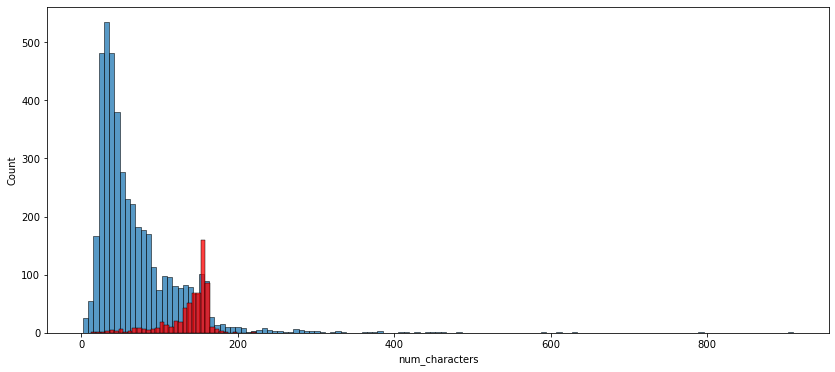

In [27]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

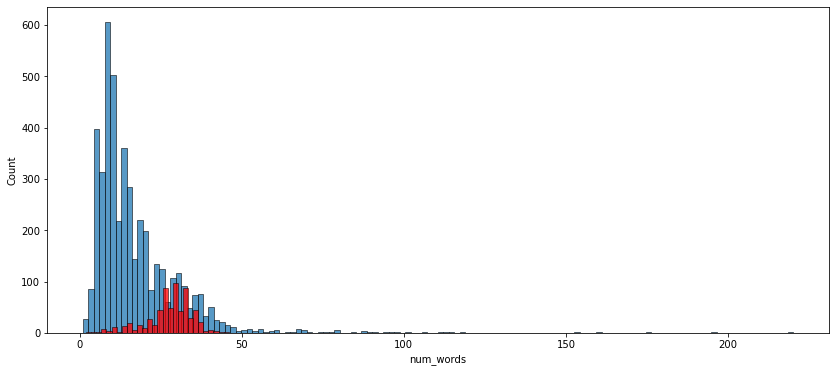

In [28]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

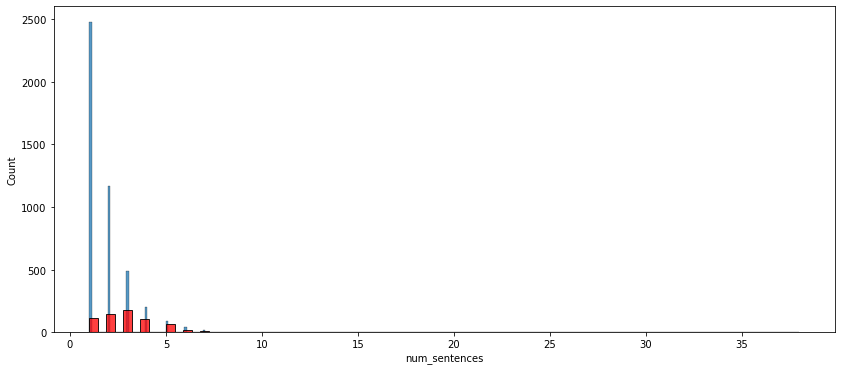

In [29]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()

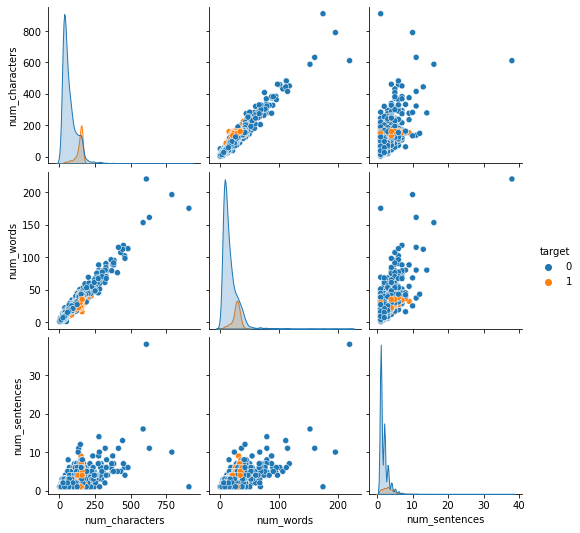

In [30]:
sns.pairplot(df, hue='target')
plt.show()

In [31]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


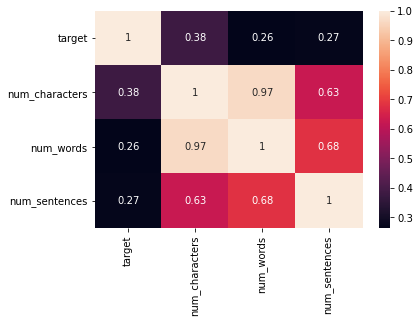

In [32]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## 4. Text Preprocessing

- lowercasing
- tokenization
- removing special characters
- stemming

In [33]:
# nltk.download('stopwords')

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
            
            
    return " ".join(y)

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


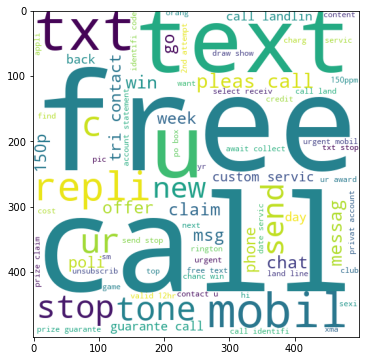

In [37]:
# pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(18,6))
plt.imshow(spam_wc)
plt.show()

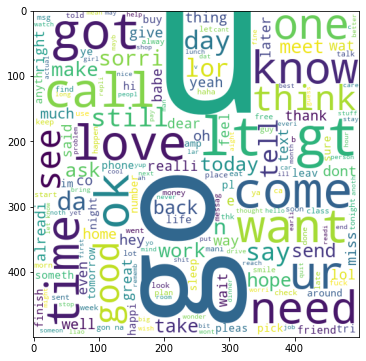

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(18,6))
plt.imshow(ham_wc)
plt.show()

In [39]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9941

C:\Users\RAJAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


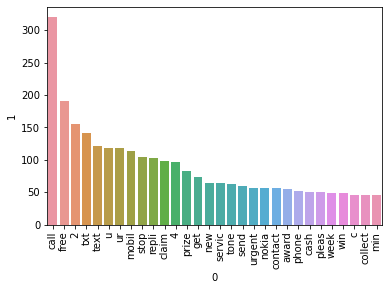

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

35303

C:\Users\RAJAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


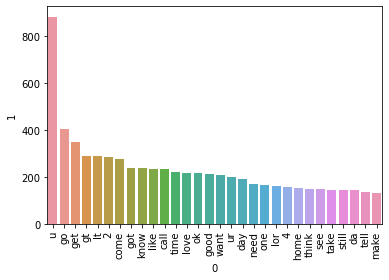

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Building

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#### Using Count Vectorizer

In [46]:
cv = CountVectorizer()

In [47]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 6677)

In [49]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred1))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred1))
print()
print("Precision Score =",precision_score(y_test, y_pred1))

Gaussian Naive Bayes
Confusion Matrix
[[790 106]
 [ 20 118]]

Accuracy Score = 0.8781431334622823

Precision Score = 0.5267857142857143


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred2))
print()
print("Precision Score =",precision_score(y_test, y_pred2))

Multinomial Naive Bayes
Confusion Matrix
[[872  24]
 [ 12 126]]

Accuracy Score = 0.965183752417795

Precision Score = 0.84


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred3))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred3))
print()
print("Precision Score =",precision_score(y_test, y_pred3))

Bernoulli Naive Bayes
Confusion Matrix
[[894   2]
 [ 27 111]]

Accuracy Score = 0.971953578336557

Precision Score = 0.9823008849557522


#### Using tfidf Vectorizer

In [55]:
tfidf = TfidfVectorizer()

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 6677)

In [58]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred1))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred1))
print()
print("Precision Score =",precision_score(y_test, y_pred1))

Gaussian Naive Bayes
Confusion Matrix
[[791 105]
 [ 25 113]]

Accuracy Score = 0.874274661508704

Precision Score = 0.518348623853211


In [62]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred2))
print()
print("Precision Score =",precision_score(y_test, y_pred2))

Multinomial Naive Bayes
Confusion Matrix
[[896   0]
 [ 42  96]]

Accuracy Score = 0.9593810444874274

Precision Score = 1.0


In [63]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred3))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred3))
print()
print("Precision Score =",precision_score(y_test, y_pred3))

Bernoulli Naive Bayes
Confusion Matrix
[[894   2]
 [ 27 111]]

Accuracy Score = 0.971953578336557

Precision Score = 0.9823008849557522


#### tfidf vectorizer with maxfeatures=3000

In [89]:
tfidf = TfidfVectorizer(max_features=3000)

In [90]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [91]:
X.shape

(5169, 3000)

In [92]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [94]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred1))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred1))
print()
print("Precision Score =",precision_score(y_test, y_pred1))

Gaussian Naive Bayes
Confusion Matrix
[[788 108]
 [ 26 112]]

Accuracy Score = 0.8704061895551257

Precision Score = 0.509090909090909


In [96]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred2))
print()
print("Precision Score =",precision_score(y_test, y_pred2))

Multinomial Naive Bayes
Confusion Matrix
[[896   0]
 [ 29 109]]

Accuracy Score = 0.971953578336557

Precision Score = 1.0


In [97]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes")
print("="*20)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred3))
print()
print("Accuracy Score =",accuracy_score(y_test, y_pred3))
print()
print("Precision Score =",precision_score(y_test, y_pred3))

Bernoulli Naive Bayes
Confusion Matrix
[[895   1]
 [ 16 122]]

Accuracy Score = 0.9835589941972921

Precision Score = 0.991869918699187


`Since data is imbalance, so precision score matters more than accuracy score. So I am keeping Multinomial Naive Bayes with tfidf vectorizer with max_feature 3000.`

#### Applying other machine learning algorithms

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,objective='binary:logistic',use_label_encoder=False, random_state=2)

In [74]:
clfs = {'Support Vector Classification' : svc,
        'K Neighbors Classifier'  : knc,
        'Multinomial Naive Bayes'  : mnb,
        'Decision Tree Classifier'  : dtc,
        'Logistic Regression'  : lrc,
        'Random Forest Classifier'  : rfc,
        'AdaBoost Classifier' : abc,
        'Bagging Classifier' : bc,
        'Extra Trees Classifier' : etc,
        'Gradient Boosting Classifier': gbdt,
        'XGBoost Classifier' : xgb }

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Classification
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406

For  K Neighbors Classifier
Accuracy -  0.9052224371373307
Precision -  1.0

For  Multinomial Naive Bayes
Accuracy -  0.971953578336557
Precision -  1.0

For  Decision Tree Classifier
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416

For  Logistic Regression
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697

For  Random Forest Classifier
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829

For  AdaBoost Classifier
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454

For  Bagging Classifier
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693

For  Extra Trees Classifier
Accuracy -  0.9796905222437138
Precision -  0.975609756097561

For  Gradient Boosting Classifier
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918

[13:47:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric use

In [77]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values(['Precision','Accuracy'],ascending=False)

performance_df

,Algorithm,Accuracy,Precision
2,Multinomial Naive Bayes,0.971954,1.000000
1,K Neighbors Classifier,0.905222,1.000000
5,Random Forest Classifier,0.975822,0.982906
8,Extra Trees Classifier,0.979691,0.975610
0,Support Vector Classification,0.974855,0.974576
4,Logistic Regression,0.956480,0.969697
6,AdaBoost Classifier,0.961315,0.945455
10,XGBoost Classifier,0.968085,0.933884
9,Gradient Boosting Classifier,0.946809,0.927835
7,Bagging Classifier,0.959381,0.869231


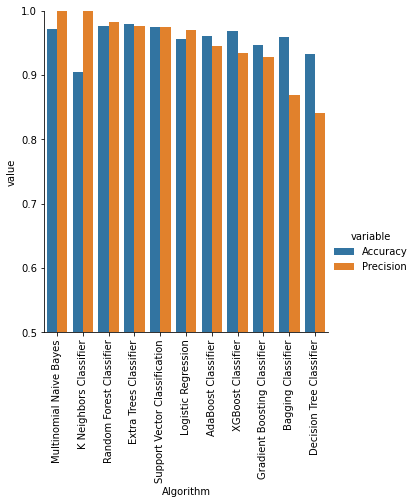

In [78]:
sns.catplot(data=pd.melt(performance_df, id_vars='Algorithm'), 
            x='Algorithm', y='value', height=5,
            kind='bar', hue='variable')

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

`Top model is Multinomial Naive Bayes with Accuracy 0.97 and Precision 1.`<br>
`Now, I am trying to improve accuracy little bit more by applying voting and stacking classifier among best 3 models.`

#### Applying Voting

In [79]:
# improve model accuracy by applying Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [80]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [81]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
y_pred = voting.predict(X_test)
print('Voting Classifier')
print('='*20)
print("Accuracy -",accuracy_score(y_test,y_pred))
print("Precision -",precision_score(y_test,y_pred))

Voting Classifier
Accuracy - 0.9825918762088974
Precision - 0.9918032786885246


#### Applying Stacking

In [83]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [84]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [86]:
print('Stacking Classifier')
print('='*20)
print("Accuracy -",accuracy_score(y_test,y_pred))
print("Precision -",precision_score(y_test,y_pred))

Stacking Classifier
Accuracy - 0.9806576402321083
Precision - 0.9402985074626866


`Not getting desire result by applying voting or stacking classifier. Since precision score is very important due to imbalance of dataset. So I'am taking them as part of my model.`

`For final model I am selecting tfidf vectorizer with Multinomial Naive Bayes.`	

## 6. Saving Model

In [98]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))